<a href="https://colab.research.google.com/github/Neissandy/AprendizagemMaquina_atv04/blob/master/Atividade_semana_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Conjunto de dados de doenças cardiovasculares**

Link do dataset GitHub: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

Exercício baseado no passo a passo da aula prática 09/09. As análises e interpretações dos resultados obtidos estão descritos ao decorrer da atividade.

O Dataset foi reduzido de 70000 para 10000 instâncias. Essa modificação foi realizada com o objetivo de reduzir o tempo de execução dos códigos, ou seja, apenas para realização da atividade. 


**Recursos**:
1. Idade | Recurso objetivo | idade | int (dias)
2. Gênero | Recurso objetivo | gênero | código categórico |
3. Altura | Recurso objetivo | altura | int (cm) |
4. Peso | Recurso objetivo | peso | flutuador (kg) |

5. Pressão arterial sistólica | Recurso de exame | ap_hi | int |
6. Pressão arterial diastólica | Recurso de exame | ap_lo | int |
7. Colesterol | Recurso de exame | colesterol | 1: normal, 2: acima do normal, 3: muito acima do normal |
8. Glicose | Recurso de exame | gluc | 1: normal, 2: acima do normal, 3: muito acima do normal |
9. Fumar | Característica subjetiva | fumaça | binário |
10. Ingestão de álcool | Característica subjetiva | alco | binário |
11. Atividade física | Característica subjetiva | ativo | binário |
12. Presença ou ausência de doença cardiovascular | Variável de destino | cardio | binário |

**Objetivo:** Pacientes que apresentam ou não doença cardiovascular.

# Análise de Agrupamento

# 1. Importando bibliotecas necessárias

---



In [2]:
#Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import accuracy_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import fowlkes_mallows_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

# 2. Preparando Dados

---



In [3]:
#Lendo csv e armazenando em um dataframe
dados = pd.read_csv('/content/cardio_trainTESTE1.csv')
dados.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
#Verificando quantidade de linhas e colunas de toda a base de dados
dados.shape

(9999, 13)

# 3. Iniciando limpeza de dados

---



In [5]:
#Verificar se existem valores NAN, ? ou dados faltantes
dados = dados.dropna()

In [6]:
#Excluir colunas irrelevantes
dados = dados.drop(columns=['id'])

In [7]:
dados.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# 4. Realizando re-escala

---



In [8]:
#Re-escala usando máximo e mínimo
dados = (dados - dados.min())/(dados.max()-dados.min())

In [9]:
dados.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0.587477,1.0,0.544444,0.188235,0.018103,0.008,0.0,0.0,0.0,0.0,1.0,0.0
1,0.730926,0.0,0.477778,0.323529,0.020690,0.009,1.0,0.0,0.0,0.0,1.0,1.0
2,0.623749,0.0,0.527778,0.200000,0.019828,0.007,1.0,0.0,0.0,0.0,0.0,1.0
3,0.527283,1.0,0.550000,0.305882,0.021552,0.010,0.0,0.0,0.0,0.0,1.0,1.0
4,0.515635,0.0,0.477778,0.152941,0.017241,0.006,0.0,0.0,0.0,0.0,0.0,0.0


# 5. Organizando dados para modelagem

---

In [10]:
#Dividindo dados em atributos descritores e atributo de classe
X = dados.iloc[:,:11]
X.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0.587477,1.0,0.544444,0.188235,0.018103,0.008,0.0,0.0,0.0,0.0,1.0
1,0.730926,0.0,0.477778,0.323529,0.020690,0.009,1.0,0.0,0.0,0.0,1.0
2,0.623749,0.0,0.527778,0.200000,0.019828,0.007,1.0,0.0,0.0,0.0,0.0
3,0.527283,1.0,0.550000,0.305882,0.021552,0.010,0.0,0.0,0.0,0.0,1.0
4,0.515635,0.0,0.477778,0.152941,0.017241,0.006,0.0,0.0,0.0,0.0,0.0


In [11]:
y = dados.cardio
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: cardio, dtype: float64

**ANÁLISE:** Após a re-escala, os dados foram separados em x e y, sendo y o rótulo para cada instância x.

#6. Definindo o algoritmo de agrupamento


---
## 6.1 Utilizando K-means


In [12]:
#Criando modelo K-means
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
#Aplicando modelo aos dados de teste
kmeans_labels = kmeans.predict(X)
kmeans_labels

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

**ANÁLISE:** O primeiro tipo de algoritmo de agrupamento testado foi o K-means. Nele foi definido 2 clusters que se referem ao atributo 'cardio': 0 para pacientes sem doença cardiovascular e 1 para pacientes com doença cardiovascular. O K-means vai prever os rótulos com base em 'cardio'.

## Visualisando resultados do agrupamento

---



In [14]:
X = X.reset_index(drop=True)

In [15]:
#Adicionando as labels ao teste para fins de visualização
grupos = pd.DataFrame(kmeans_labels)
X.insert((X.shape[1]),'cardio',grupos)

In [16]:
Sdoenca = X[X['cardio']==0]
Cdoenca = X[X['cardio']==1]

In [17]:
plt.rcParams["figure.figsize"] = (12,9)

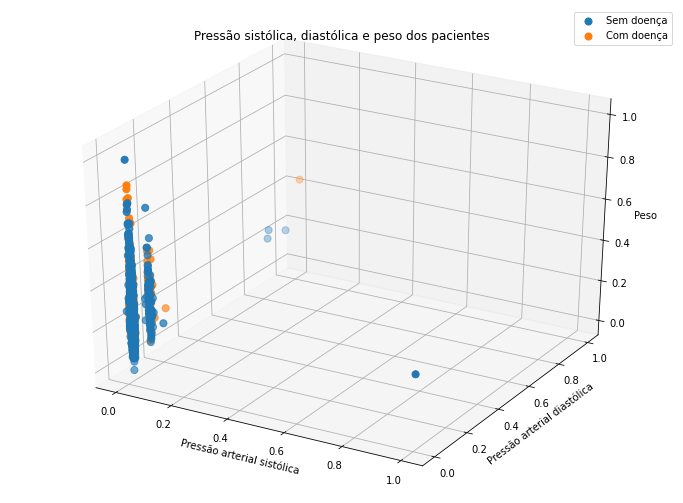

In [18]:
#Comparando em gráfico 3D peso, pressão arterial sistólica e distólica dos pacientes
ax = plt.axes(projection='3d')
ax.scatter3D(Sdoenca.ap_hi,Sdoenca.ap_lo,Sdoenca.weight,s=50,label='Sem doença')
ax.scatter3D(Cdoenca.ap_hi,Cdoenca.ap_lo,Cdoenca.weight,s=50,label='Com doença')
plt.legend()
ax.set_xlabel('Pressão arterial sistólica')
ax.set_ylabel('Pressão arterial diastólica')
ax.set_zlabel('Peso')
plt.title('Pressão sistólica, diastólica e peso dos pacientes')
plt.show()

**ANÁLISE:** Foi plotado em um gráfico 3D os atributos peso, pressão sistólica e diastólica de acordo com os pacientes que apresentam ou não doença cardiovascular. Podemos concluir que há uma grande concentração de dados (pontos azuis e laranja) no canto esquerdo do gráfico. O comportamento de dados para pacientes com e sem a doença é praticamente a mesma. É notável também alguns outliers.

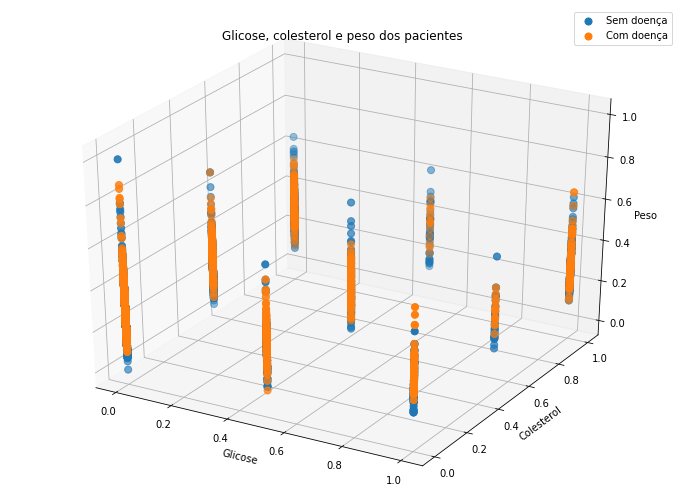

In [19]:
#Comparando em gráfico 3D glicose, colesterol e peso dos pacientes
ax = plt.axes(projection='3d')
ax.scatter3D(Sdoenca.gluc,Sdoenca.cholesterol,Sdoenca.weight,s=50,label='Sem doença')
ax.scatter3D(Cdoenca.gluc,Cdoenca.cholesterol,Cdoenca.weight,s=50,label='Com doença')
plt.legend()
ax.set_xlabel('Glicose')
ax.set_ylabel('Colesterol')
ax.set_zlabel('Peso')
plt.title('Glicose, colesterol e peso dos pacientes')
plt.show()

**ANÁLISE:** O comportamento dos dados para pacientes com ou sem doença cardiovascular é praticamente a mesma. É possível notar que quando a taxa de glicose aumenta, o colesterol aumenta um pouco. Mesmo com a variação da idade, esse comportamento permanece. Podemos observar que estão concentrados em áreas específicas no gráfico. Os dados sobre colesterol e glicose foram registrados no dataset em int, dessa forma os dados estão consentrados dessa forma. Não há praticamente diferença entre o comportamento dos dados para pacientes com ou sem doença quando comparamos com taxa de colesterol e glicose.

In [20]:
plt.rcParams["figure.figsize"] = (24,20)

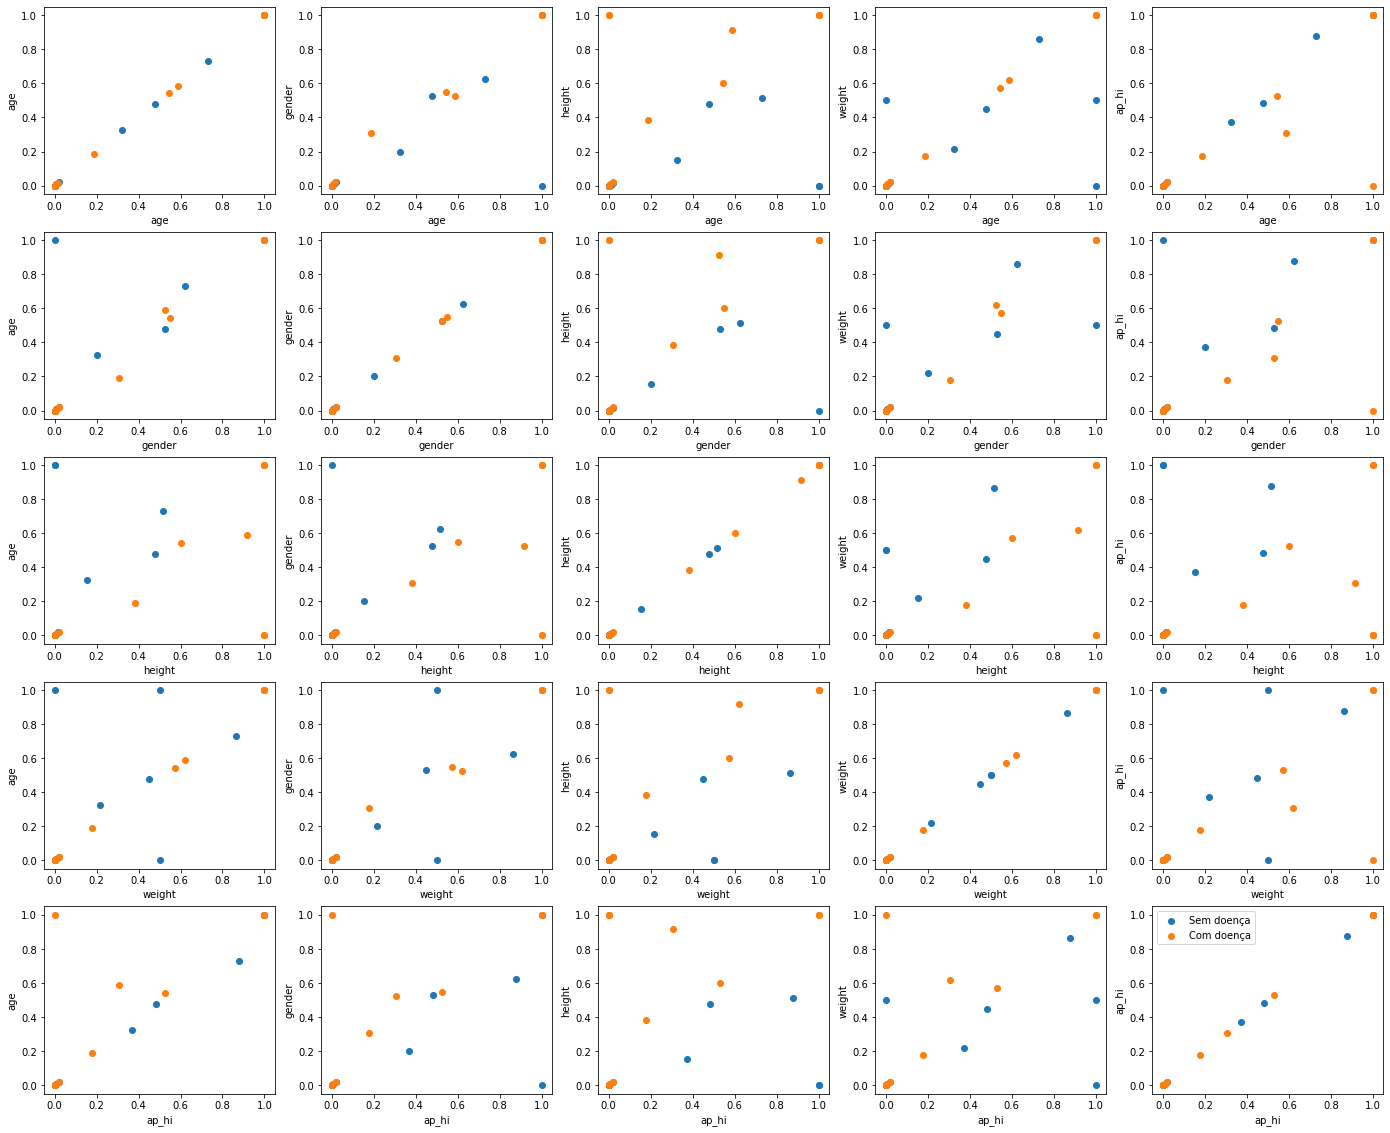

In [21]:
#Plotando comparação dos 5 primeiros atributos
fig, axs = plt.subplots(5,5)
for i in range(5):
  for j in range(5):
    axs[i,j].scatter(Sdoenca.iloc[i],Sdoenca.iloc[j],label='Sem doença')
    axs[i,j].scatter(Cdoenca.iloc[i],Cdoenca.iloc[j],label='Com doença')
    axs[i,j].set(xlabel=X.columns[i],ylabel=X.columns[j])
plt.legend()
plt.show()

**ANÁLISE:** Foram plotados diversos gráficos, representando exclusivamente os 5 primeiros atributos e suas correlações. Os dados (pontos azuis e laranjas) estão bastante dispersos, mostrando mais uma vez o que já foi confirmado em atividades anteriores: esses atributos possuem uma baixa correlação.

### 6.1.2 Avaliando modelo k-means

---



In [22]:
#Calculando a acurácia >>  K-means
acuracia = accuracy_score(y,kmeans_labels)
round(acuracia,3)

0.5

In [23]:
#Calculando índice Rand Ajustado >>  K-means
rand_score = adjusted_rand_score(y,kmeans_labels)
rand_score

-9.40061706068412e-05

In [24]:
#Calculando scores baseados em informações mútua >>  K-means
mutual_info = adjusted_mutual_info_score(y,kmeans_labels)
mutual_info

-7.151977124175693e-05

In [25]:
#Calculando Fowlkes-Mallows scores >>  K-means
fm = fowlkes_mallows_score(y,kmeans_labels)
fm

0.5232920716802012

In [26]:
#Excluindo a coluna diagnóstico
X = X.drop(columns=['cardio'])

In [27]:
#Calculando índice Davies-Boldin >>  K-means
db = davies_bouldin_score(X,kmeans_labels)
db

1.3059532125534778

In [28]:
#Calculando coeficiente de silhueta >>  K-means
ss = silhouette_score(X,kmeans_labels,metric='euclidean')
ss

0.38521241548291324

In [29]:
#Calculando índice Calinski-Harabasz >>  K-means
ch = calinski_harabasz_score(X,kmeans_labels)
ch

4528.374887327478

## 6.2 Utilizando Agrupamento Hierárquico

---



In [30]:
#definindo modelo e realizando agrupamento
hierarquico = AgglomerativeClustering(n_clusters=2)
labels_hierarquico = hierarquico.fit(X).labels_

In [31]:
labels_hierarquico

array([1, 0, 0, ..., 0, 0, 0])

**ANÁLISE:** Outro tipo de algoritimo de agrupamento foi uilizado, desta vez o agrupamento hierárquico. Da mesma forma como o K-means, foi definido 2 clusters, relacionado a coluna 'cardio'.

### 6.2.2 Avaliando o modelo

---



In [32]:
#Calculando a acurácia >> Hierárquico
acuracia = accuracy_score(y,labels_hierarquico)
round(acuracia,3)

0.491

In [33]:
#Calculando índice Rand Ajustado >>  Hierárquico
rand_score = adjusted_rand_score(y,labels_hierarquico)
rand_score

0.00025980179926729264

In [34]:
#Calculando scores baseados em informações mútua >> Hierárquico
mutual_info = adjusted_mutual_info_score(y,labels_hierarquico)
mutual_info

0.00016471263496000606

In [35]:
#Calculando Fowlkes-Mallows scores >> Hierárquico
fm = fowlkes_mallows_score(y,labels_hierarquico)
fm

0.5385524226825912

In [36]:
#Calculando índice Davies-Boldin >> Hierárquico
db = davies_bouldin_score(X,labels_hierarquico)
db

1.5083930181796399

In [37]:
#Calculando coeficiente de silhueta >> Hierárquico
ss = silhouette_score(X,labels_hierarquico,metric='euclidean')
ss

0.33032021812605633

In [38]:
#Calculando índice Calinski-Harabasz >> Hierárquico
ch = calinski_harabasz_score(X,labels_hierarquico)
ch

3028.752964714703

**ANÁLISE:** Ambos os algoritmos passaram por avaliação. Foi concluido que em maioria, o agrupamento hierárquico apresentou melhores resultados, entretanto, em alguns tipos de avaliação o k-means foi melhor. A acurácia, coeficiente de silhueta e índice de Calinski-Harabasz foi melhor no k-means.

Um ponto em observação é sobre o resultado obtido no índice de Rand ajustado para o K-means. Deu um resultado negativo. Provavelmente o resultado foi muito ruim para esse tipo de avaliação.

Mesmo que o modelo hierárquico tenha obtido melhores resultados comparado ao k-means, se olhado de modo geral, a taxa de agrupamento não foi tão boa. Como já analisado nas atividades anteriores, a correlação baixa entre as instâncias e o rótulo(com ou sem doença cardiovascular), fazendo com que o agrupamento não tenha resultados tão bons. 

Acredito que os resultados seriam melhores se forem adicionados mais atributos. As informações que estão nesse dataset não são suficientes para definir se o paciente possui ou não a doença. Outras informações adicionadas ajudariam a detalhar a situação de cada paciente e dessa forma consequentimente aumentaria a taxa de acerto.